# Phase 1 Project Aircrafts Risks Analysis

* Student name: DAVID AMOS MNENE
* Student pace: PART TIME
* Scheduled project review date/time: 27-JUL-2025 23:59
* Instructor name: FIDELIS WANALWENGE
* Blog post URL: https://github.com/mnenedavid/phase1project_potential_aircrafts_risks.git

## Business Problem Statement

- My company is expanding in to new industries to diversify its portfolio. 
- Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft.
- I am charged with determining which aircraft are the lowest risk for the company to start this new business endeavor.
- I must then translate my findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

### Key Business Questions
1. What aircraft make and models have a low risk?
2. What aircraft category and flight purpose have a low risk?
3. What environmental or conditions are correlated with less risk?

## The Data Overview

1. The dataset is from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters.
2. I shall analyse and use the data to make actionable insights to aid in the aircraft purchase decision

In [1]:
# importing required project libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading the aviation dataset to the df dataframe
df = pd.read_csv('./Data/Aviation_Data.csv')

C:\Users\david.mnene\AppData\Local\Temp\ipykernel_111464\1151442054.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./Data/Aviation_Data.csv')


# DATA CLEANING PREPARATION
- The dataset has 90348 rows and 31 columns.
- Several columns have null values and the column dataypes are objects and floats64(integers)

RECOMMENDATION DECISION BASED COLUMNS:
1. MAKE
2. MODEL

FOCUS COLUMNS TO USE TO GET THE CLEANED DATAFRAME:
1. Purpose.of.flight
2. Aircraft.Category

COLUMN RISK ANALYSIS:
1. Injury.Severity
2. Aircraft.damage
3. Total.Fatal.Injuries
4. Total.Serious.Injuries
5. Total.Minor.Injuries
6. Total.Uninjured
7. Injury.Severity
8. Weather.Condition
9. Amateur.Built

In [3]:
#checking the overal number of rows and columns
df.shape

(90348, 31)

In [4]:
#load first five records to get a glimpse view of the data 
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
#confirming the column data type of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [6]:
#removing null rows which the make and model column values are both null, since they do not identify an aircraft if they are null
make_model_is_null = df['Make'].isna() & df['Model'].isna()
df_make_model_not_null = df.drop(df[make_model_is_null].index)

In [7]:
#identifying the relevant unique aircrafts category 
df_make_model_not_null['Aircraft.Category'].unique()

array([nan, 'Airplane', 'Helicopter', 'Glider', 'Balloon', 'Gyrocraft',
       'Ultralight', 'Unknown', 'Blimp', 'Powered-Lift', 'Weight-Shift',
       'Powered Parachute', 'Rocket', 'WSFT', 'UNK', 'ULTR'], dtype=object)

In [8]:
#removing unrequired categories, required categories are as per the business need for commercial and private enterprises
required_aicraft_categories = ['Airplane','Helicopter','Powered-Lift','Blimp']
df_required_aircraft_categories = df_make_model_not_null[df_make_model_not_null['Aircraft.Category'].isin(required_aicraft_categories)]

In [9]:
#identifing the relevant_purpose_flight
df_required_aircraft_categories['Purpose.of.flight'].unique()

array([nan, 'Personal', 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Positioning', 'Other Work Use',
       'Flight Test', 'Public Aircraft - Federal', 'Air Race/show',
       'Air Drop', 'Public Aircraft - State', 'Glider Tow', 'Banner Tow',
       'External Load', 'Public Aircraft - Local', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [10]:
#removing unrequired purpose of flight, required purpose are as per the business need for commercial and private enterprises
relevant_purpose_of_flight = ['Personal', 'Business','Executive/corporate']
df_relevant_purpose_of_flight = df_required_aircraft_categories[df_required_aircraft_categories['Purpose.of.flight'].isin(relevant_purpose_of_flight)]

In [11]:
# reformat the make and mode name to uppercase
df_relevant_purpose_of_flight.loc[:,'Make'] = df_relevant_purpose_of_flight['Make'].str.strip().str.upper()
df_relevant_purpose_of_flight.loc[:,'Model'] = df_relevant_purpose_of_flight['Model'].str.strip().str.upper()

In [12]:
#identifying aircraft makes value counts in order to get most common one's
df_relevant_purpose_of_flight['Make'].value_counts()

Make
CESSNA                    5215
PIPER                     3228
BEECH                     1217
MOONEY                     364
BELLANCA                   225
                          ... 
EMBRAER S A                  1
SCODA AERONAUTICA LTDA       1
SEABOURN SCOTT R             1
MARY ALEXANDER               1
SHIREY DAVID A               1
Name: count, Length: 3186, dtype: int64

In [13]:
#identify the make count distribution  
df_make_counts = df_relevant_purpose_of_flight['Make'].value_counts()

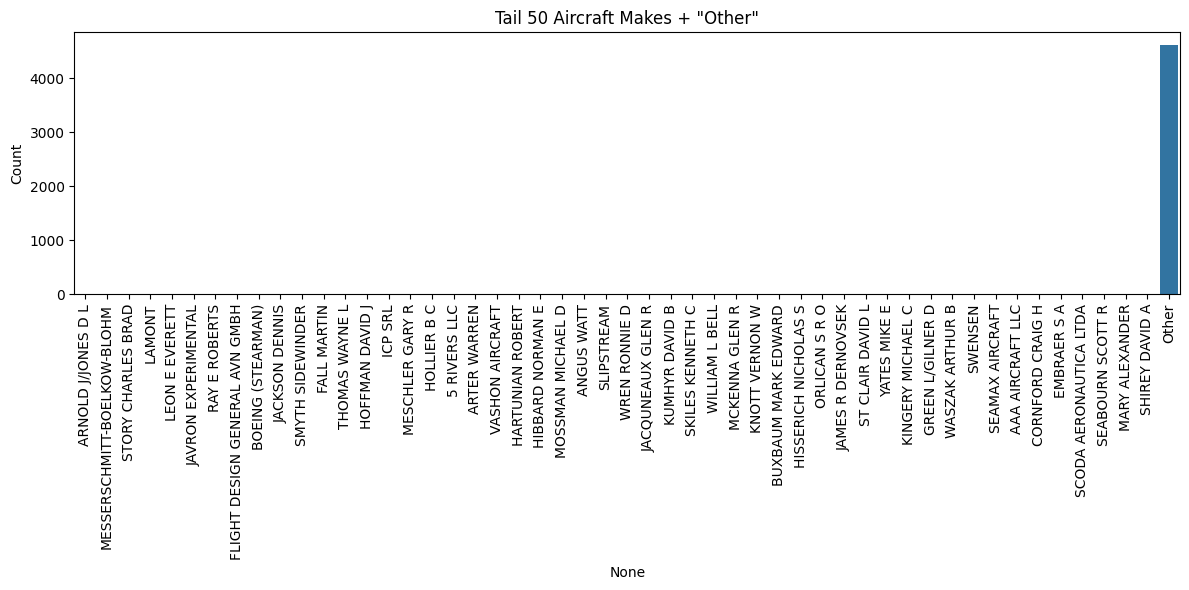

In [14]:
#visualize using barplot the aircraft make distribution from the tail, the ones with the least appearance (rare)
tail_n = 50 
top_makes = df_make_counts.tail(tail_n)
other_count = df_make_counts[tail_n:].sum()

# Combine into a new Series
plot_data = plot_data = pd.concat([top_makes, 
    pd.Series(other_count, index=['Other']) ])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=plot_data.index, y=plot_data.values)
plt.xticks(rotation=90)
plt.title(f'Tail {tail_n} Aircraft Makes + "Other"')
plt.ylabel('Count')
plt.tight_layout()

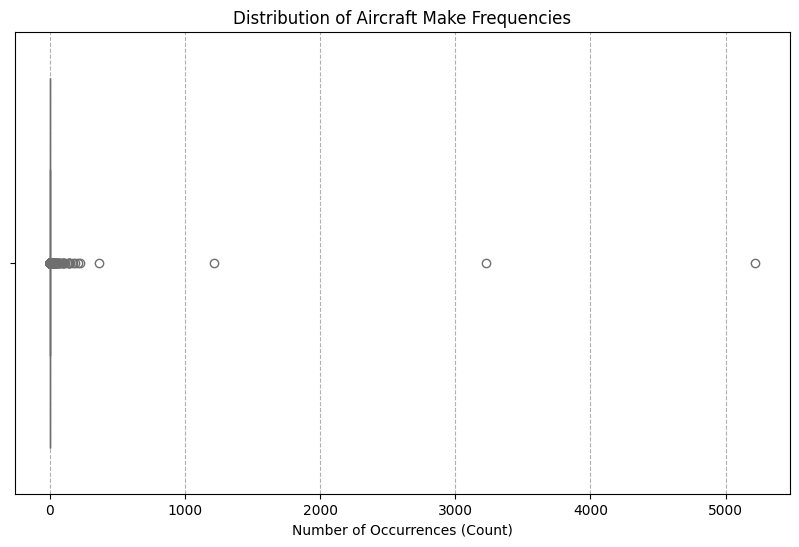

In [15]:
# distribution view of the aircraft makes appearance frequncies
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_make_counts.values, color='skyblue')
plt.title('Distribution of Aircraft Make Frequencies')
plt.xlabel('Number of Occurrences (Count)')
plt.grid(axis='x', linestyle='--')
plt.show()

From the above visulaization, it shows that most of the aircraft makes have a low value count, hence are rare as they appear less than the others, this may skew the data and will require them to be removed.

In [16]:
# # describe the make_count subset in order to make a decision to remove the aircraft makes 
# # that appear less as it means that they are rare and they skew the data
df_make_counts.describe()

count    3186.000000
mean        5.627433
std       111.384836
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max      5215.000000
Name: count, dtype: float64

## From the above statitisc it means:
- count	3443.000000	- Total unique aircraft makes in my dataset.
- mean	5.207377 - On average, each make appears ~5 times.
- std	76.531039 -	High standard deviation → Counts vary widely (many rare aircraft makes, a few common).
- min	1.000000 - At least one aircraft make appears only once.
- 25%	1.000000 - 25% of aircraft makes appear once or less (i.e., most appear exactly once).
- 50%	1.000000 - Median aircraft make appears only once → 50% of aircraft makes are singletons.
- 75%	1.000000 - 75% of aircraft makes appear once or less (i.e., almost all are rare).
- max	2940.000000 - The most frequent aircraft make appears 2,940 times.

In [17]:
#Remove makes with counts <50 to reduce noise.
# The column Make will only have the most popular aircraft makes retain their original names, and all others are grouped together as "Other".
threshold = 50
df_relevant_purpose_of_flight = df_relevant_purpose_of_flight.copy()
df_relevant_purpose_of_flight['Make'] = df_relevant_purpose_of_flight['Make'].where(
    df_relevant_purpose_of_flight['Make'].isin(df_make_counts[df_make_counts >= threshold].index), 
    'Other'
)

In [18]:
df_make_counts_after = df_relevant_purpose_of_flight['Make'].value_counts().sort_values(ascending=True)

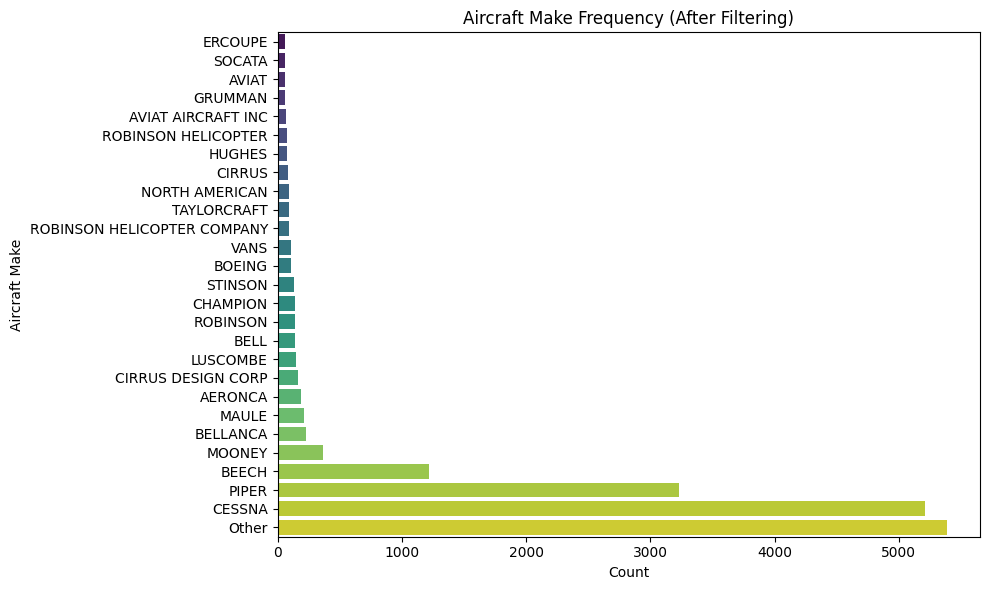

In [19]:
plt.figure(figsize=(10, 6))

# Create the bar plot and explicitly assign a label
ax = sns.barplot(
    y=df_make_counts_after.index,
    x=df_make_counts_after.values,
    hue=df_make_counts_after.index,
    palette="viridis",
    legend=False
)

# Set titles and labels
plt.title('Aircraft Make Frequency (After Filtering)')
plt.xlabel('Count')
plt.ylabel('Aircraft Make')

plt.tight_layout()
plt.show()

In [20]:
# identtifying the make values that are of similar name company
df_relevant_purpose_of_flight['Make'].value_counts()

Make
Other                          5385
CESSNA                         5215
PIPER                          3228
BEECH                          1217
MOONEY                          364
BELLANCA                        225
MAULE                           211
AERONCA                         185
CIRRUS DESIGN CORP              167
LUSCOMBE                        146
BELL                            142
ROBINSON                        142
CHAMPION                        139
STINSON                         132
BOEING                          109
VANS                            107
ROBINSON HELICOPTER COMPANY      95
TAYLORCRAFT                      94
NORTH AMERICAN                   93
CIRRUS                           86
HUGHES                           77
ROBINSON HELICOPTER              73
AVIAT AIRCRAFT INC               65
GRUMMAN                          62
AVIAT                            60
ERCOUPE                          58
SOCATA                           58
Name: count, dtype: int

In [21]:
# rename the above make values like AVIAT TO AVIAT AIRCRAFT INC, ROBINSON HELICOPTER to ROBINSON HELICOPTER COMPANY 
# that are of similar name
df_relevant_purpose_of_flight['Make'] = df_relevant_purpose_of_flight['Make'].replace({'AVIAT': 'AVIAT AIRCRAFT INC',
                                              'ROBINSON HELICOPTER': 'ROBINSON HELICOPTER COMPANY', 
                                              'ROBINSON': 'ROBINSON HELICOPTER COMPANY',
                                              'CIRRUS': 'CIRRUS DESIGN CORP','BELL': 'BELLANCA'})

In [22]:
#Transform the event date and publication date to dateformats
df_relevant_purpose_of_flight = df_relevant_purpose_of_flight.copy()
df_relevant_purpose_of_flight['Event.Date'] = pd.to_datetime(df_relevant_purpose_of_flight['Event.Date'])

In [23]:
df_relevant_purpose_of_flight['Publication.Date'] = pd.to_datetime(df_relevant_purpose_of_flight['Publication.Date'],format='%d-%m-%Y')

In [24]:
df_relevant_purpose_of_flight.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17935 entries, 7 to 90345
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                17935 non-null  object        
 1   Investigation.Type      17935 non-null  object        
 2   Accident.Number         17935 non-null  object        
 3   Event.Date              17935 non-null  datetime64[ns]
 4   Location                17935 non-null  object        
 5   Country                 17931 non-null  object        
 6   Latitude                15528 non-null  object        
 7   Longitude               15520 non-null  object        
 8   Airport.Code            12139 non-null  object        
 9   Airport.Name            12537 non-null  object        
 10  Injury.Severity         17921 non-null  object        
 11  Aircraft.damage         17851 non-null  object        
 12  Aircraft.Category       17935 non-null  object     

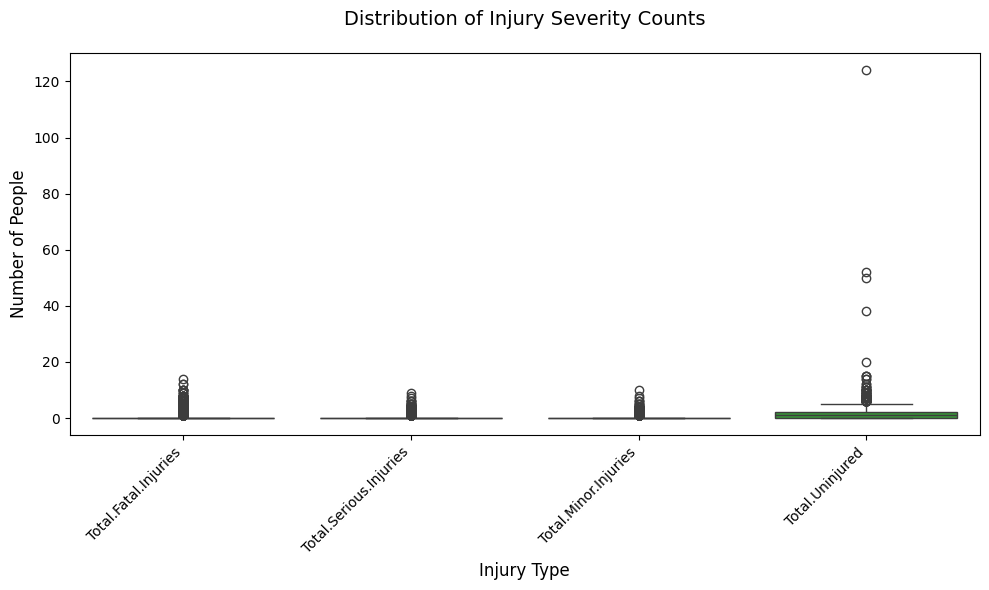

In [25]:
# Melt the data for Seaborn
df_melted = df_relevant_purpose_of_flight.melt(
    value_vars=['Total.Fatal.Injuries', 'Total.Serious.Injuries', 
               'Total.Minor.Injuries', 'Total.Uninjured'],
    var_name='Injury Type', 
    value_name='Count'
)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(
    data=df_melted,
    x='Injury Type',
    y='Count',
    hue='Injury Type',  # Assign hue to x to avoid warning
    palette=['#d62728', '#ff7f0e', '#1f77b4', '#2ca02c'],
    legend=False,       # Disable redundant legend
    ax=ax
)

# Customize the plot
ax.set_title('Distribution of Injury Severity Counts', fontsize=14, pad=20)
ax.set_xlabel('Injury Type', fontsize=12)
ax.set_ylabel('Number of People', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# RISK ANALYSIS

## 1. Survival_rate
### Higher survival rate, lower risk
Created a new column called survial rate based on the four measures for fatality Total.Fatal.Injuries, Total.Serious.Injuries, 
Total.Minor.Injuries and Total.Uninjured, given a weightage of 1 to uninjured, 0.8 to minor, 0.3 to serious and 0 to fatal, survival rate formula is based on (Total.Fatal.Injuries*weightage + Total.Serious.Injuries*weightage + Total.Minor.Injuries*weightage + Total.Uninjured*weightage)/ (total number of people from the four listed columns) * 100

In [26]:
# Define weights for injury types
weights = {
    'Uninjured': 1.0,
    'Minor': 0.8,
    'Serious': 0.3,
    'Fatal': 0.0
}

# Calculate weighted survival rate
df_relevant_purpose_of_flight['survival_rate'] = (df_relevant_purpose_of_flight['Total.Uninjured'].fillna(0)*weights['Uninjured'] + 
    df_relevant_purpose_of_flight['Total.Minor.Injuries'].fillna(0)*weights['Minor'] + 
    df_relevant_purpose_of_flight['Total.Serious.Injuries'].fillna(0)*weights['Serious']
) / (
    df_relevant_purpose_of_flight['Total.Uninjured'].fillna(0) + 
    df_relevant_purpose_of_flight['Total.Minor.Injuries'].fillna(0) + 
    df_relevant_purpose_of_flight['Total.Serious.Injuries'].fillna(0) + 
    df_relevant_purpose_of_flight['Total.Fatal.Injuries'].fillna(0)
) * 100

# Handle divide-by-zero and NaN cases
df_relevant_purpose_of_flight['survival_rate'] = np.where(
    (df_relevant_purpose_of_flight['Total.Uninjured'] == 0) & 
    (df_relevant_purpose_of_flight['Total.Minor.Injuries'] == 0) & 
    (df_relevant_purpose_of_flight['Total.Serious.Injuries'] == 0) & 
    (df_relevant_purpose_of_flight['Total.Fatal.Injuries'] == 0),
    np.nan,  # Mark cases with no people as NaN
    df_relevant_purpose_of_flight['survival_rate']
)

# Round to 1 decimal place
df_relevant_purpose_of_flight['survival_rate'] = df_relevant_purpose_of_flight['survival_rate'].round(1)
print(df_relevant_purpose_of_flight[['Total.Fatal.Injuries', 'Total.Serious.Injuries',
                                     'Total.Minor.Injuries', 'Total.Uninjured', 'survival_rate']].head(20))

    Total.Fatal.Injuries  Total.Serious.Injuries  Total.Minor.Injuries  \
7                    0.0                     0.0                   0.0   
8                    0.0                     0.0                   0.0   
12                   0.0                     0.0                   1.0   
13                   1.0                     0.0                   0.0   
14                   1.0                     0.0                   0.0   
15                   2.0                     0.0                   0.0   
16                   0.0                     0.0                   0.0   
17                   3.0                     0.0                   0.0   
18                   0.0                     0.0                   0.0   
19                   0.0                     0.0                   0.0   
21                   0.0                     0.0                   0.0   
23                   0.0                     0.0                   0.0   
24                   2.0              

## 2. Damage_rate 
### Higher damage rate, lower risk
Created a new column based on the aircraft damage column, the three main catgories are substanial, destroyed and minor, I provided a weightage of destroyed as 1, substantial as 2 and minor as 3, with the highest rate number having the lowest risk.

In [27]:
df_relevant_purpose_of_flight['Aircraft.damage'].value_counts()

Aircraft.damage
Substantial    15377
Destroyed       2244
Minor            195
Unknown           35
Name: count, dtype: int64

In [28]:
#remove unknown rows in the aircraft damage column
df_relevant_purpose_of_flight = df_relevant_purpose_of_flight[df_relevant_purpose_of_flight['Aircraft.damage'] != 'Unknown']

In [29]:
# Create a mapping dictionary for aircraft damage column
damage_mapping = {
    'Destroyed': 1,      # Most severe damage
    'Substantial': 2,   # Substantial damage
    'Minor': 3         # Minor damage
}

df_relevant_purpose_of_flight['Damage_rate'] = df_relevant_purpose_of_flight['Aircraft.damage'].map(damage_mapping)

In [30]:
df_relevant_purpose_of_flight.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,survival_rate,Damage_rate
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,1982-01-01,100.0,2.0
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,1982-01-01,100.0,2.0
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,1983-01-02,80.0,1.0
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,1983-01-02,0.0,1.0
14,20020917X02119,Accident,FTW82FPJ10,1982-01-02,"CHICKASHA, OK",United States,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,1983-01-02,0.0,1.0


## 3. Injury_severity_rate
### Higher injury rate, lower risk
- Created a new column based on the injury severity, the column had unique values such as Fatal,Fatal(1),
Fatal(10),Fatal(12),Fatal(2),Fatal(3),Fatal(4),Fatal(5),Fatal(6),Fatal(7),Fatal(8),Incident,Minor,Non-Fatal and Serious. 
- For easy management all Fatal values I tranformed them to Fatal in order to fit into the weightage below. 
This is also ok, since the fatal numbers (n) have been accounted for in the survival rate.
- I did a weightage of Fatal as 1, Serious as 2,Incident as 3,Minor as 4 and Non-Fatal as 5

In [31]:
df_relevant_purpose_of_flight['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal    14247
Fatal         2717
Fatal(1)       275
Fatal(2)       205
Minor          122
Serious         92
Fatal(3)        76
Fatal(4)        57
Incident        52
Fatal(5)        16
Fatal(6)        10
Fatal(8)         7
Fatal(7)         5
Fatal(10)        3
Fatal(12)        2
Name: count, dtype: int64

In [32]:
# transform all Fatal(n) values to Fatal for easy weightage assigmnet
df_relevant_purpose_of_flight['Injury.Severity'] = (
    df_relevant_purpose_of_flight['Injury.Severity']
    .replace(r'^Fatal\(\d+\)$', 'Fatal', regex=True)
)

In [33]:
# Create a mapping dictionary for injury severity column
injury_mapping = {
    'Fatal': 1,      
    'Serious': 2,  
    'Incident': 3,       
    'Minor': 4,
    'Non-Fatal': 5
}

df_relevant_purpose_of_flight['Injury_severity_rate'] = df_relevant_purpose_of_flight['Injury.Severity'].map(injury_mapping)


In [34]:
df_relevant_purpose_of_flight.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,survival_rate,Damage_rate,Injury_severity_rate
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,1982-01-01,100.0,2.0,5.0
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,0.0,0.0,2.0,IMC,Landing,Probable Cause,1982-01-01,100.0,2.0,5.0
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,0.0,1.0,0.0,IMC,Cruise,Probable Cause,1983-01-02,80.0,1.0,5.0
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,1983-01-02,0.0,1.0,1.0
14,20020917X02119,Accident,FTW82FPJ10,1982-01-02,"CHICKASHA, OK",United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,IMC,Cruise,Probable Cause,1983-01-02,0.0,1.0,1.0


### Amateur Built 
The existing column, amateur built is either Yes or No, if Yes it means it was built by amateurs/starter company while if No, 
it means it was built by a Professional company

In [35]:
df_relevant_purpose_of_flight['Amateur.Built'].value_counts()

Amateur.Built
No     14951
Yes     2945
Name: count, dtype: int64

### Number of Engines
The existing column has five values, 0,1,2,3,4 with the number meaning the available number of engines, 
removing 0 values from the dataset as it is not per our business need

In [36]:
df_relevant_purpose_of_flight = df_relevant_purpose_of_flight[df_relevant_purpose_of_flight['Number.of.Engines'] != 0 ]

In [37]:
df_relevant_purpose_of_flight['Number.of.Engines'].value_counts()

Number.of.Engines
1.0    15868
2.0     1434
3.0        3
4.0        2
Name: count, dtype: int64

### Weather condition
The existing column has three values: 
- VMC-Visual Meteorological Conditions, are weather conditions where visibility, 
cloud clearance, and ceiling meet or exceed minimum standards for pilots to fly by visual reference (no reliance on instruments).
- IMC-Instrument Meteorological Conditions, are weather conditions requiring pilots to rely on instruments for navigation and control.
- UNK-uknown weather condition, this rows can be removed as they are less in number

In [38]:
#remove unknown weather conditions
exclude_values = ['Unk','UNK']
df_relevant_purpose_of_flight = df_relevant_purpose_of_flight[df_relevant_purpose_of_flight['Weather.Condition'].apply
(lambda x: x not in exclude_values)]

In [39]:
df_cleaned = df_relevant_purpose_of_flight[df_relevant_purpose_of_flight['Make'] != 'Other']

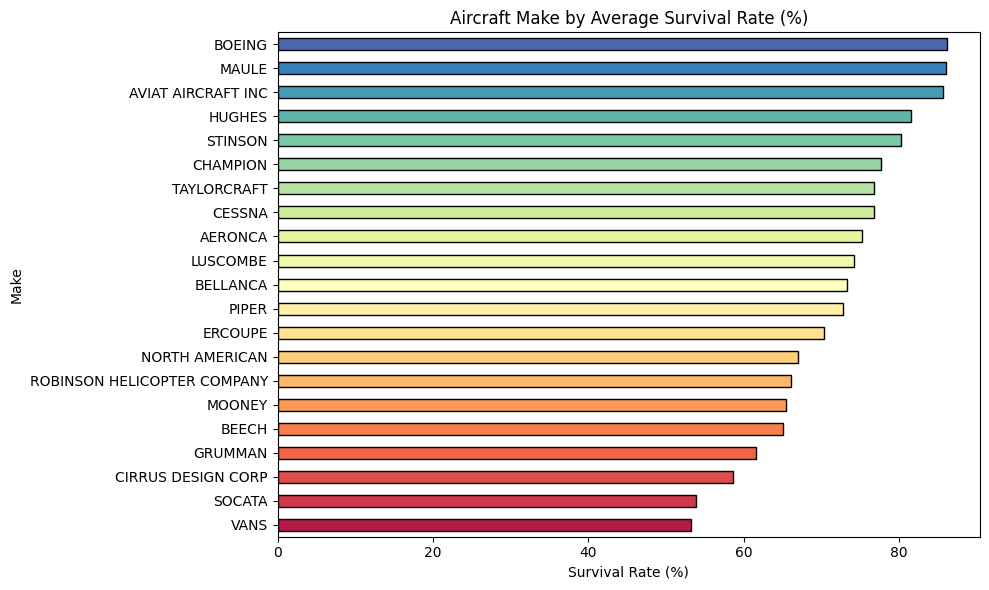

In [40]:
# Plot survival rates by aircraft make
makes_survival = df_cleaned.groupby('Make')['survival_rate'].mean().sort_values(ascending=True)
makes_survival.plot(kind='barh', color=sns.color_palette("Spectral", len(makes_survival)),edgecolor='black', figsize=(10, 6))
plt.title('Aircraft Make by Average Survival Rate (%)')
plt.xlabel('Survival Rate (%)')
plt.tight_layout()
plt.show()

### SAFETY SCORE RATE
Calculate a composite safety score (0-1) for each aircraft make by combining:
- Survival rate (higher = better)
- Damage rate (higher = better)
- Injury severity (higher = better)

Formula for the calulation is (survival_rate/100)*weightage1 + ((damage_rate-1)/2)*weightage2 + ((injury_rate-1)/4)*weightage3

In [41]:
def calculate_safety_score(df_cleaned, survival_col='survival_rate', damage_col='Damage_rate', 
                          injury_col='Injury_severity_rate', weights=None):
    """
    Calculate a composite safety score (0-1) for each aircraft make by combining:
    - Survival rate (higher = better)
    - Damage rate (higher = better)
    - Injury severity (higher = better)
    
    Args:
        df (pd.DataFrame): Input DataFrame containing the metrics.
        survival_col (str): Column name for survival rate (0-100%).
        damage_col (str): Column name for damage rate (1=destroyed to 3=minor).
        injury_col (str): Column name for injury severity (1=fatal to 5=non-fatal).
        weights (dict): Custom weights for each metric. Defaults to {'survival': 0.5, 'damage': 0.3, 'injury': 0.2}.
    
    Returns:
        pd.DataFrame: Original DataFrame with a new 'safety_score' column (0-1 scale).
    """
    # Create a copy to avoid SettingWithCopyWarning
    df_cleaned = df_cleaned.copy()
    
    # Default weights if not provided
    if weights is None:
        weights = {'survival': 0.5, 'damage': 0.3, 'injury': 0.2}
    
    # Step 1: Normalize each metric to 0-1 scale (higher = safer)
    df_cleaned['normalized_survival'] = df_cleaned[survival_col] / 100  # Survival rate is already 0-100%
    df_cleaned['normalized_damage'] = (df_cleaned[damage_col] - 1) / 2  # Map 1→0, 2→0.5, 3→1
    df_cleaned['normalized_injury'] = (df_cleaned[injury_col] - 1) / 4  # Map 1→0, 2→0.25, ..., 5→1
    
    # Step 2: Calculate weighted safety score
    df_cleaned['safety_score'] = (
        (df_cleaned['normalized_survival'] * weights['survival']) +
        (df_cleaned['normalized_damage'] * weights['damage']) +
        (df_cleaned['normalized_injury'] * weights['injury'])
    )
    
    # Step 3: Round for readability
    df_cleaned['safety_score'] = df_cleaned['safety_score'].round(3)
    
    # Optional: Drop intermediate normalized columns
    df_cleaned.drop(['normalized_survival', 'normalized_damage', 'normalized_injury'], 
            axis=1, inplace=True, errors='ignore')
    
    return df_cleaned


In [42]:
df_with_safety = calculate_safety_score(df_cleaned)

# ANALYSIS RESULTS

### TOP FIVE AIRCRAFT MAKES BY AVERAGE SAFETY SCORE
By visualizing the below aircraft makes against the safety score metric in order to identify the top five aircraft makes
that have a higher safety score, meaning a lower risk.

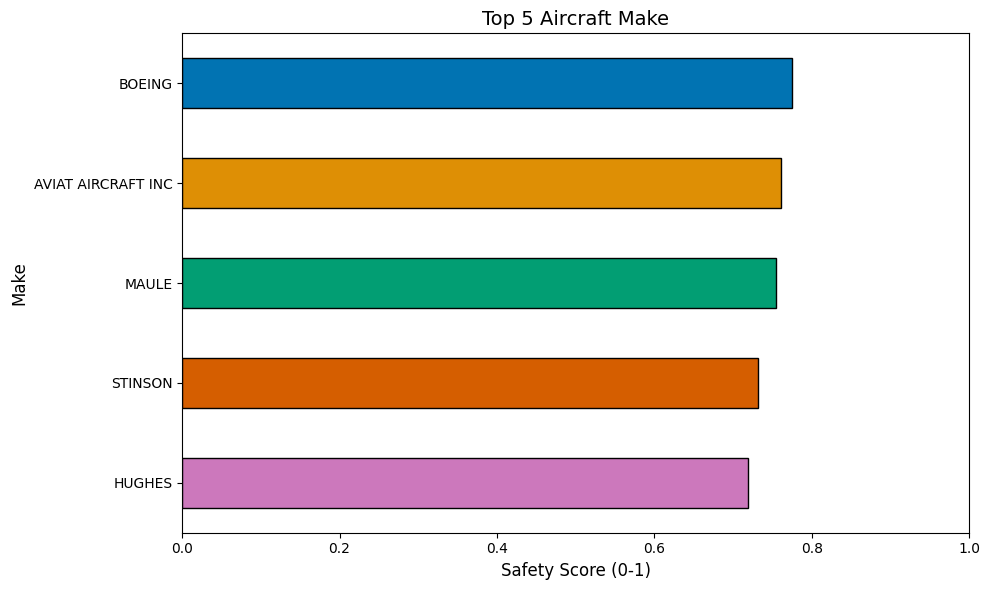

In [43]:
#Grouping by aircraft make to indetify the top five makes with best safety score
top_5 = (
    df_with_safety.groupby('Make')['safety_score'].mean().sort_values(ascending=False).head(5)
)

# Plot with highest at top
fig, ax = plt.subplots(figsize=(10, 6))
top_5.plot(kind='barh', color=sns.color_palette("colorblind", len(makes_survival)),edgecolor='black', ax=ax)
ax.invert_yaxis()  # Critical: reverses order

# Customize
ax.set_title('Top 5 Aircraft Make', fontsize=14)
ax.set_xlabel('Safety Score (0-1)', fontsize=12)
ax.set_ylabel('Make', fontsize=12)
ax.set_xlim(0, 1)  # Ensure consistent scale

plt.tight_layout()
plt.show()

### TOP FIVE AIRCRAFT MAKE/MODEL
By visualizing the below aircraft makes/model against the safety score metric in order to identify the top five aircraft makes/model
that have a higher safety score which relates to a lower risk.

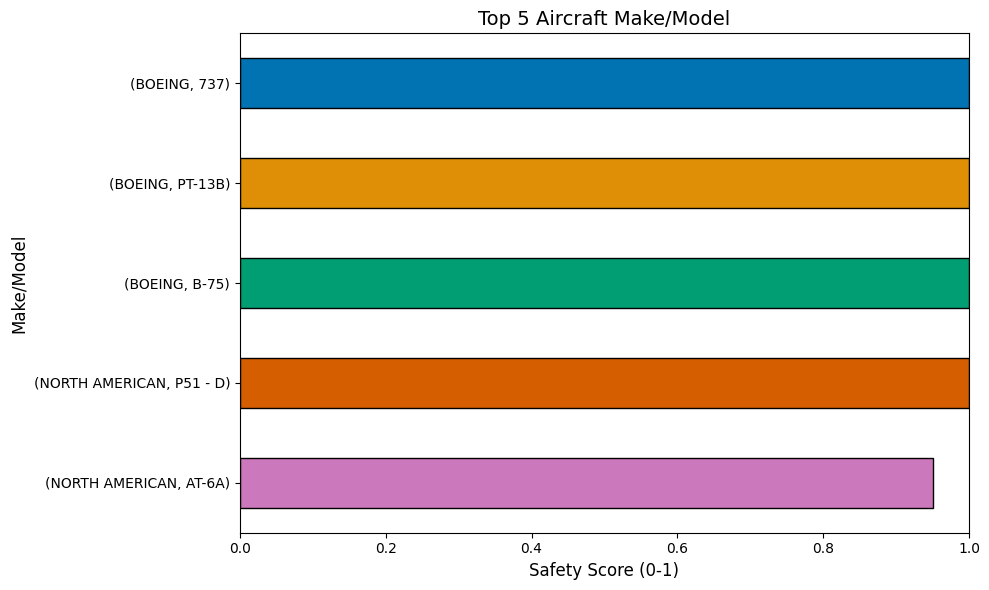

In [44]:
# Group by Make and Model, calculate mean survival rate, and take top 5
top_5 = (
    df_with_safety.groupby(['Make', 'Model'])['safety_score'].mean().sort_values(ascending=False).head(5)
)

# Plot with highest at top
fig, ax = plt.subplots(figsize=(10, 6))
top_5.plot(kind='barh', color=sns.color_palette("colorblind", len(makes_survival)),edgecolor='black', ax=ax)
ax.invert_yaxis()  # Critical: reverses order

# Customize
ax.set_title('Top 5 Aircraft Make/Model', fontsize=14)
ax.set_xlabel('Safety Score (0-1)', fontsize=12)
ax.set_ylabel('Make/Model', fontsize=12)
ax.set_xlim(0, 1)  # Ensure consistent scale

plt.tight_layout()
plt.show()

### TOP FIVE AIRCRAFT MAKE/MODEL AND CATEGORY/PURPOSE
By visualizing the below aircraft makes/model and category/purpose against the safety score metric in order to identify the top five aircraft makes/model and their category and purpose
that have a higher safety score which relates to a lower risk.

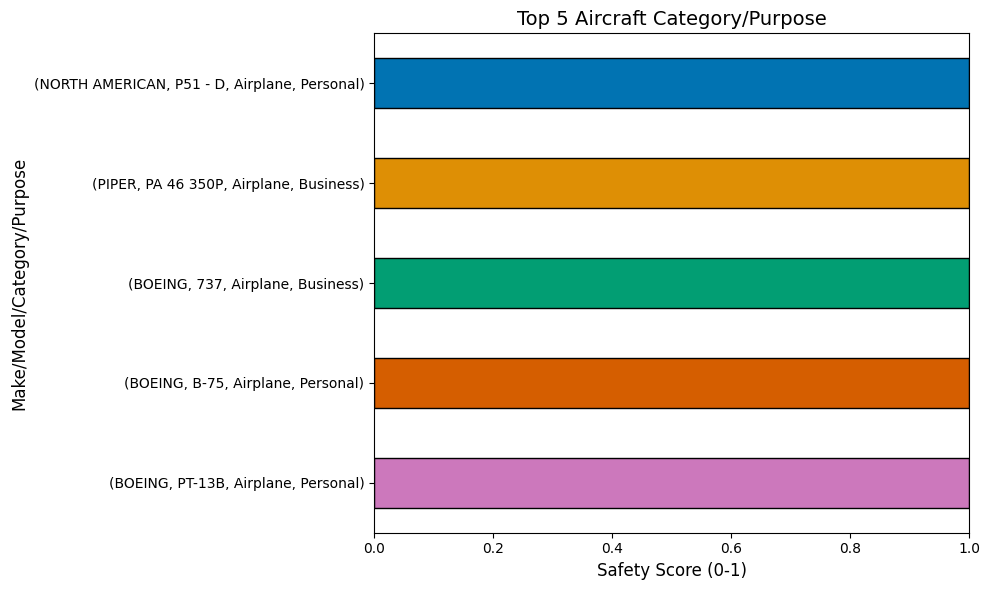

In [45]:
# Group by Make, Model,Aircraft category and purpose of flight against the mean survival rate for the top five
top_5 = (
    df_with_safety.groupby(['Make', 'Model','Aircraft.Category','Purpose.of.flight'])['safety_score'].mean().sort_values(ascending=False).head(5)
)

# Plot with highest at top
fig, ax = plt.subplots(figsize=(10, 6))
top_5.plot(kind='barh', color=sns.color_palette("colorblind", len(makes_survival)),edgecolor='black', ax=ax)
ax.invert_yaxis()  # Critical: reverses order

# Customize
ax.set_title('Top 5 Aircraft Category/Purpose', fontsize=14)
ax.set_xlabel('Safety Score (0-1)', fontsize=12)
ax.set_ylabel('Make/Model/Category/Purpose', fontsize=12)
ax.set_xlim(0, 1)  # Ensure consistent scale

plt.tight_layout()
plt.show()

### AMATEUR BUILT RELATION TO THE SAFETY SCORE
By visualizing the below aircraft amateur built relation to the safety score metric and identfying that amateur builts have a better safety score than the professionals built.

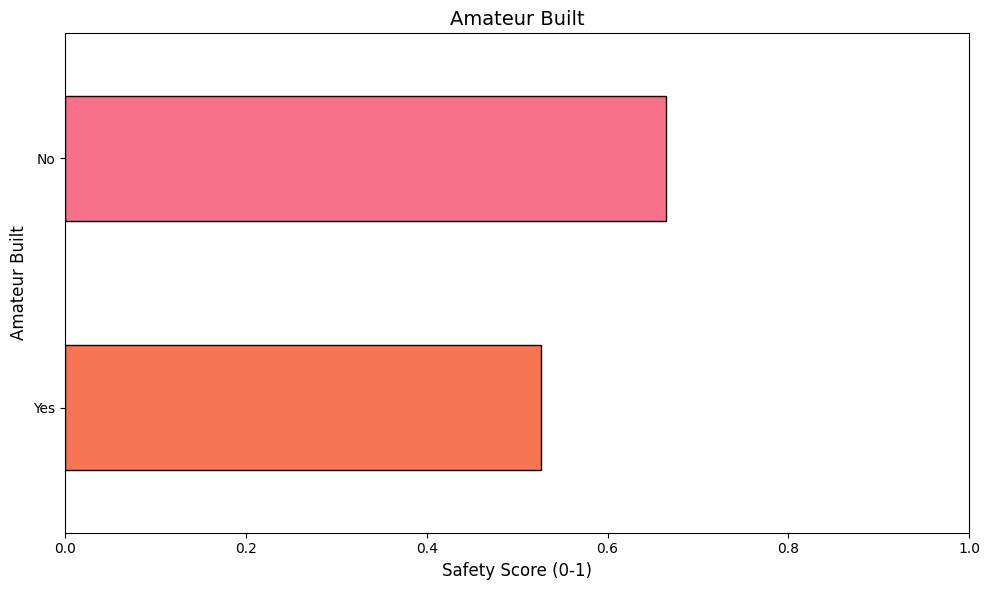

In [46]:
# Group by Amateur_Built against the mean survival rate for the two Yes and No values to identify any relationships 
# between the amateur built and safety score
Amateur_Built = (
    df_with_safety.groupby('Amateur.Built')['safety_score'].mean().sort_values(ascending=False)
)

# Plot with highest at top
fig, ax = plt.subplots(figsize=(10, 6))
Amateur_Built.plot(kind='barh', color=sns.color_palette("husl", len(makes_survival)),edgecolor='black', ax=ax)
ax.invert_yaxis()  # Critical: reverses order

# Customize
ax.set_title('Amateur Built', fontsize=14)
ax.set_xlabel('Safety Score (0-1)', fontsize=12)
ax.set_ylabel('Amateur Built', fontsize=12)
ax.set_xlim(0, 1)  # Ensure consistent scale

plt.tight_layout()
plt.show()

### NUMBER OF ENGINES RELATION TO THE SAFETY SCORE
By visualizing the below aircraft engine numbers relation to the safety score metric and identfying that engine numbers have a better safety score than the aircrafts less engines.

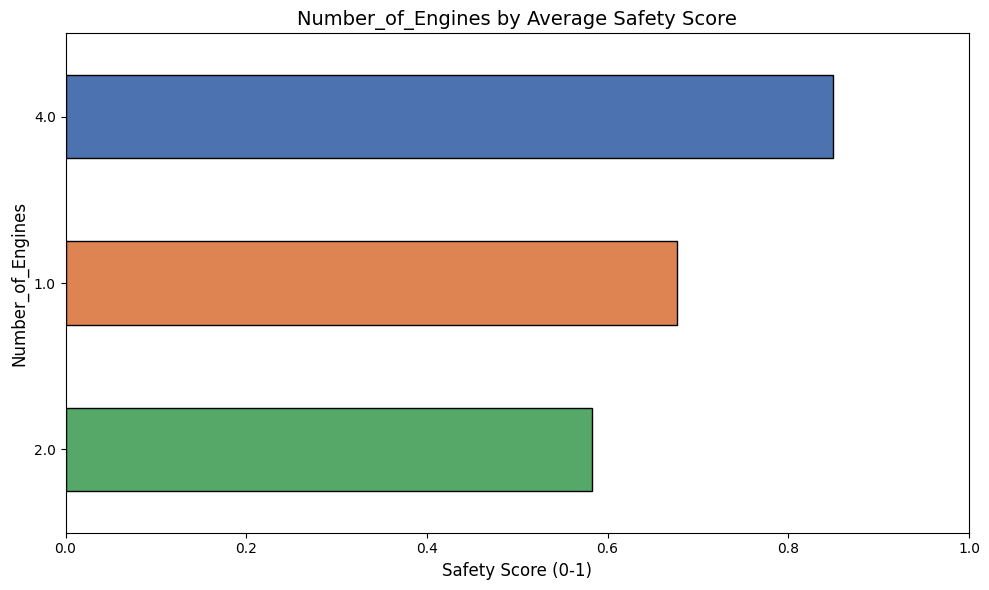

In [47]:
# Group by Number of Engines against the mean survival rate to identify any relationships 
# between the Number of Engines and safety score
Number_of_Engines = (
    df_with_safety.groupby('Number.of.Engines')['safety_score'].mean().sort_values(ascending=False)
)

# Plot with highest at top
fig, ax = plt.subplots(figsize=(10, 6))
Number_of_Engines.plot(kind='barh', color=sns.color_palette("deep", len(makes_survival)),edgecolor='black', ax=ax)
ax.invert_yaxis()  # Critical: reverses order

# Customize
ax.set_title('Number_of_Engines by Average Safety Score', fontsize=14)
ax.set_xlabel('Safety Score (0-1)', fontsize=12)
ax.set_ylabel('Number_of_Engines', fontsize=12)
ax.set_xlim(0, 1)  # Ensure consistent scale

plt.tight_layout()
plt.show()

### WEATHER CONDITION RELATION TO THE SAFETY SCORE
By visualizing the below weather condition relation to the safety score metric and identfying that the VMC-Visual Meteorological Conditions have a better safety score than the IMC-Instrument Meteorological Conditions.

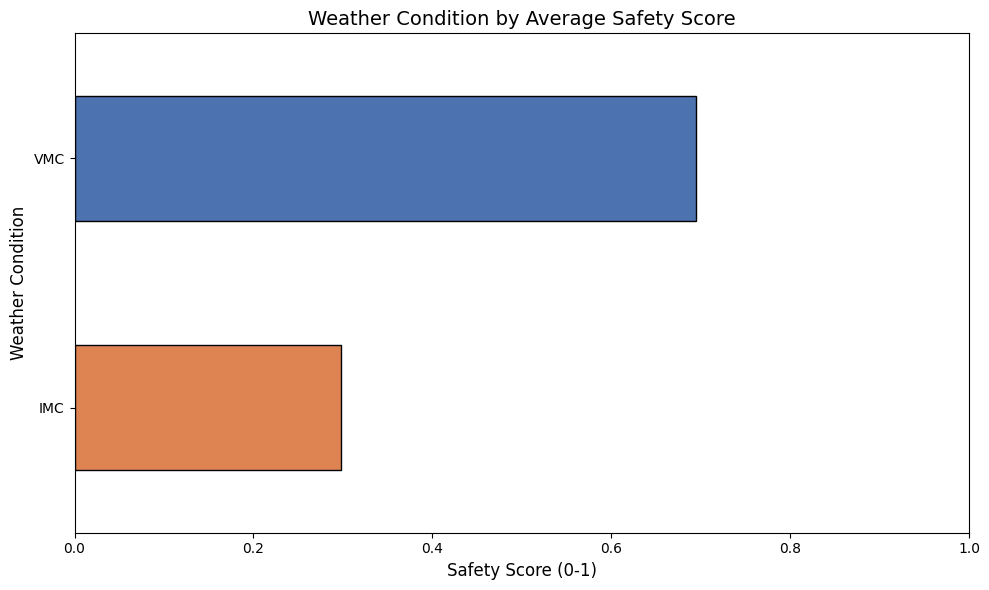

In [48]:
# Group by Weather_Condition against the mean survival rate to identify any relationships 
# between the Weather_Condition and safety score
Weather_Condition = (
    df_with_safety.groupby('Weather.Condition')['safety_score'].mean().sort_values(ascending=False)
)

# Plot with highest at top
fig, ax = plt.subplots(figsize=(10, 6))
Weather_Condition.plot(kind='barh', color=sns.color_palette("deep", len(makes_survival)),edgecolor='black', ax=ax)
ax.invert_yaxis()  # Critical: reverses order

# Customize
ax.set_title('Weather Condition by Average Safety Score', fontsize=14)
ax.set_xlabel('Safety Score (0-1)', fontsize=12)
ax.set_ylabel('Weather Condition', fontsize=12)
ax.set_xlim(0, 1)  # Ensure consistent scale

plt.tight_layout()
plt.show()

## Summary

### In conclusion, from the above analysis:
- I recommend the top five aircraft makes, that is Boeing, Aviat Aircraft Inc, Maule, Stinson, Hughes, with a favor for Boeing mostly as it has the best safety rate as per the above analysis. The Boeing model that is recommended is Boeing 737, Boeing PT-138 and Boeing B-75.
- The best category is Airplane and Personal and Business Purpose flights.

## Additional note:
- The amatuer built aircrafts have suprisingly a better safety score as compared to their counterparts built by professionals. But this can be due to the fact that the amatuer built aircrafts are more in number than the professionals built.
- On the number of engines observation, it is not fully observed as some aircrafts with one engine have a higher survival rate as compared to those with two engines, more analysis can be done to find the definate conclusion.
- The weather condition VMC had a better saftey score than IMC. VMC tops due to reliance on Pilots visuals as mostly this is used when the weather conditions are good and moderate, less errors as compared to IMC use of aircraft instruments which are mostly used when the weather conditions are hostile and visibility is bad.